In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras import optimizers
from keras.optimizers import Adam 
from keras import regularizers
from keras import layers
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


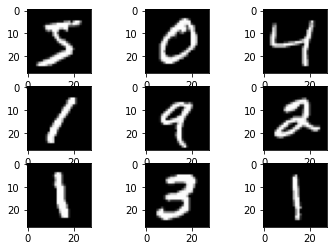

In [3]:
# load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
# reshape dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
print(train_images.shape)

print(test_images.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
#CNN
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
	# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	

In [15]:
#Training

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), verbose=2, callbacks=[learning_rate_reduction])
		


Epoch 1/10
1875/1875 - 6s - loss: 0.2368 - accuracy: 0.9266 - val_loss: 0.0569 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 - 6s - loss: 0.1009 - accuracy: 0.9699 - val_loss: 0.0418 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 - 6s - loss: 0.0781 - accuracy: 0.9761 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 4/10
1875/1875 - 6s - loss: 0.0650 - accuracy: 0.9808 - val_loss: 0.0335 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 - 6s - loss: 0.0566 - accuracy: 0.9826 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 - 6s - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 - 6s - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 8/10
1875/1875 - 6s - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 9/10
1875/1875 - 6s - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0263 - val_accuracy: 0.9915
Epoch 10/10
1875/1875 - 6s - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0259 - 

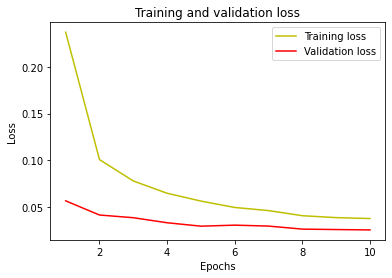

In [16]:
#plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

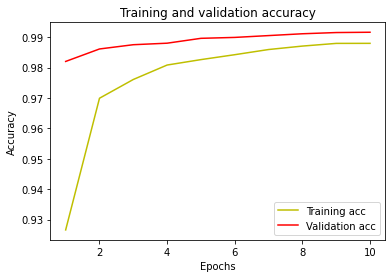

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
!mkdir -p saved_model

In [18]:
model.save('saved_model/mmnst.h5') 